In [1]:
from hyperimpute.plugins.imputers import Imputers, ImputerPlugin
from Impute import fill_with_et
from hyperimpute.plugins.utils.metrics import RMSE

imputers = Imputers()


class EtImputer(ImputerPlugin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._model = fill_with_et

    @staticmethod
    def name():
        return "et"

    @staticmethod
    def hyperparameter_space():
        return []

    def _fit(self, *args, **kwargs):
        return self

    def _transform(self, df):
        # 按照缺失值的比例进行排序
        miss_rate = df.isnull().sum() / df.shape[0]
        cols = miss_rate.sort_values().index.tolist()
        cols = [col for col in cols if miss_rate[col] > 0]
        for col in cols:
            df_col_filled = self._model(df, col)
            df[col] = df_col_filled[col]
        return df


imputers.add("et", EtImputer)

hyper = imputers.get("hyperimpute", n_inner_iter=1)
et = imputers.get("et")
missforest = imputers.get("missforest")
gain = imputers.get("gain")
sinkhorn = imputers.get("sinkhorn")
mean = imputers.get("mean")

D:\software\miniconda\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
import pandas as pd

df = pd.read_csv("./dataset/bandgap.csv")
df

,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_,target
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.0,30.0,6.48,1.40,9.340,1.220000
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.0,16.0,7.71,1.65,24.680,1.770000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.0,40.0,8.10,1.65,11.330,2.430000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.5,19.5,5.16,0.72,12.691,0.490000
4,3.490000,5.058571,7.142857,2.857143,2.348571,2.857143,24.430,1747.0,20.0,5.78,1.66,5.310,2.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.0,10.0,2.34,0.85,0.630,2.775131
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,1757.0,21.0,9.75,2.51,11.180,1.580000
2480,4.882500,4.680000,8.500000,2.500000,3.000000,1.500000,19.530,2076.0,6.0,6.51,2.45,16.680,0.200000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.0,2.0,4.26,1.38,88.100,0.600000


In [3]:
df = df.select_dtypes(include=["float64", "int64"])
df

,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_,target
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.0,30.0,6.48,1.40,9.340,1.220000
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.0,16.0,7.71,1.65,24.680,1.770000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.0,40.0,8.10,1.65,11.330,2.430000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.5,19.5,5.16,0.72,12.691,0.490000
4,3.490000,5.058571,7.142857,2.857143,2.348571,2.857143,24.430,1747.0,20.0,5.78,1.66,5.310,2.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.0,10.0,2.34,0.85,0.630,2.775131
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,1757.0,21.0,9.75,2.51,11.180,1.580000
2480,4.882500,4.680000,8.500000,2.500000,3.000000,1.500000,19.530,2076.0,6.0,6.51,2.45,16.680,0.200000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.0,2.0,4.26,1.38,88.100,0.600000


In [5]:
df.drop(labels=["target"], axis=1, inplace=True)
df

,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.0,30.0,6.48,1.40,9.340
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.0,16.0,7.71,1.65,24.680
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.0,40.0,8.10,1.65,11.330
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.5,19.5,5.16,0.72,12.691
4,3.490000,5.058571,7.142857,2.857143,2.348571,2.857143,24.430,1747.0,20.0,5.78,1.66,5.310
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.0,10.0,2.34,0.85,0.630
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,1757.0,21.0,9.75,2.51,11.180
2480,4.882500,4.680000,8.500000,2.500000,3.000000,1.500000,19.530,2076.0,6.0,6.51,2.45,16.680
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.0,2.0,4.26,1.38,88.100


In [6]:
from hyperimpute.plugins.utils.simulate import simulate_nan
import numpy as np

np.random.seed(42)
X = df
# reindex
cols = X.columns.tolist()
X = np.array(X)

sim_df = simulate_nan(X, 0.1, mecha="MAR")
X = pd.DataFrame(X, columns=cols)
X_with_nan = sim_df["X_incomp"]
mask = sim_df["mask"]
X_with_nan = pd.DataFrame(X_with_nan, columns=cols)
X_with_nan

,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.0,30.0,6.48,1.40,NaN
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.0,16.0,7.71,1.65,24.680
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.0,40.0,8.10,1.65,11.330
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.5,19.5,5.16,0.72,12.691
4,3.490000,NaN,7.142857,2.857143,2.348571,2.857143,24.430,NaN,20.0,5.78,1.66,5.310
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.0,10.0,2.34,0.85,0.630
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,NaN,21.0,9.75,2.51,11.180
2480,4.882500,4.680000,8.500000,NaN,3.000000,1.500000,19.530,2076.0,6.0,6.51,2.45,16.680
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.0,2.0,4.26,1.38,88.100


In [7]:
X_filled_et = et.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_et.values, mask))

X_filled_et

RMSE:  925.7126767345319


,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.00,30.0,6.48,1.40,9.0423
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.00,16.0,7.71,1.65,24.6800
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.00,40.0,8.10,1.65,11.3300
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.50,19.5,5.16,0.72,12.6910
4,3.490000,5.051308,7.142857,2.857143,2.348571,2.857143,24.430,1760.10,20.0,5.78,1.66,5.3100
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.00,10.0,2.34,0.85,0.6300
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,1697.47,21.0,9.75,2.51,11.1800
2480,4.882500,4.680000,8.500000,3.048183,3.000000,1.500000,19.530,2076.00,6.0,6.51,2.45,16.6800
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.00,2.0,4.26,1.38,88.1000


In [8]:
X_filled_hyper = hyper.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_hyper.values, mask))

X_filled_hyper

RMSE:  1152.77487167354


,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.000000,30.0,6.48,1.40,13.123186
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.000000,16.0,7.71,1.65,24.680000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.000000,40.0,8.10,1.65,11.330000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.500000,19.5,5.16,0.72,12.691000
4,3.490000,5.072173,7.142857,2.857143,2.348571,2.857143,24.430,1442.272949,20.0,5.78,1.66,5.310000
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.000000,10.0,2.34,0.85,0.630000
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,1829.786133,21.0,9.75,2.51,11.180000
2480,4.882500,4.680000,8.500000,2.011970,3.000000,1.500000,19.530,2076.000000,6.0,6.51,2.45,16.680000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.000000,2.0,4.26,1.38,88.100000


In [9]:
X_filled_missforest = missforest.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_missforest.values, mask))

X_filled_missforest

RMSE:  1671.0306893492289


,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.000000,30.0,6.48,1.40,14.562651
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.000000,16.0,7.71,1.65,24.680000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.000000,40.0,8.10,1.65,11.330000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.500000,19.5,5.16,0.72,12.691000
4,3.490000,5.112498,7.142857,2.857143,2.348571,2.857143,24.430,1946.830107,20.0,5.78,1.66,5.310000
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.000000,10.0,2.34,0.85,0.630000
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,2075.618302,21.0,9.75,2.51,11.180000
2480,4.882500,4.680000,8.500000,2.623112,3.000000,1.500000,19.530,2076.000000,6.0,6.51,2.45,16.680000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.000000,2.0,4.26,1.38,88.100000


In [10]:
X_filled_gain = gain.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_gain.values, mask))

X_filled_gain

RMSE:  1751.8737794721458


,0,1,2,3,4,5,6,7,8,9,10,11
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.000000,30.0,6.48,1.40,14.255896
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.000000,16.0,7.71,1.65,24.680000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.000000,40.0,8.10,1.65,11.330000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.500000,19.5,5.16,0.72,12.691000
4,3.490000,5.185077,7.142857,2.857143,2.348571,2.857143,24.430,2209.992432,20.0,5.78,1.66,5.310000
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.000000,10.0,2.34,0.85,0.630000
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,2589.922607,21.0,9.75,2.51,11.180000
2480,4.882500,4.680000,8.500000,2.741720,3.000000,1.500000,19.530,2076.000000,6.0,6.51,2.45,16.680000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.000000,2.0,4.26,1.38,88.100000


In [11]:
# set  X_filled_gain cols
X_filled_gain.columns = X.columns
X_filled_gain

,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.000000,30.0,6.48,1.40,14.255896
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.000000,16.0,7.71,1.65,24.680000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.000000,40.0,8.10,1.65,11.330000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.500000,19.5,5.16,0.72,12.691000
4,3.490000,5.185077,7.142857,2.857143,2.348571,2.857143,24.430,2209.992432,20.0,5.78,1.66,5.310000
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.000000,10.0,2.34,0.85,0.630000
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,2589.922607,21.0,9.75,2.51,11.180000
2480,4.882500,4.680000,8.500000,2.741720,3.000000,1.500000,19.530,2076.000000,6.0,6.51,2.45,16.680000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.000000,2.0,4.26,1.38,88.100000


In [18]:
X_filled_sinkhorn = sinkhorn.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_sinkhorn.values, mask))


RMSE:  1928.9184571866485


In [19]:
X_filled_sinkhorn.columns = X.columns

X_filled_sinkhorn

,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.000000,30.0,6.48,1.40,16.783406
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.000000,16.0,7.71,1.65,24.680000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.000000,40.0,8.10,1.65,11.330000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.500000,19.5,5.16,0.72,12.691000
4,3.490000,5.338843,7.142857,2.857143,2.348571,2.857143,24.430,2392.875605,20.0,5.78,1.66,5.310000
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.000000,10.0,2.34,0.85,0.630000
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,2392.704316,21.0,9.75,2.51,11.180000
2480,4.882500,4.680000,8.500000,3.174003,3.000000,1.500000,19.530,2076.000000,6.0,6.51,2.45,16.680000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.000000,2.0,4.26,1.38,88.100000


In [20]:
X_filled_mean = mean.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_mean.values, mask))

X_filled_mean.columns = X.columns
X_filled_mean

RMSE:  1928.9295230542089


,avg_Density_(g/mL),avg_Gordy_electonegativity,avg_Number_of_unfilled_d_valence_electrons,avg_abs_valence,avg_metallic_valence,avg_valence_d,sum_Density_(g/mL),sum_heat_atomization(kJ/mol),sum_valence_d,range_Density_(g/mL),range_Nagle_electonegativity,range_heat_of_fusion_(kJ/mol)_
0,4.290000,5.316140,7.000000,2.700000,2.532000,3.000000,42.900,2694.000000,30.0,6.48,1.40,17.511627
1,2.820625,5.087500,9.500000,3.500000,2.250000,0.500000,90.260,9762.000000,16.0,7.71,1.65,24.680000
2,4.810000,4.996168,7.894737,2.210526,2.829474,2.105263,91.390,5247.000000,40.0,8.10,1.65,11.330000
3,8.621500,5.020180,0.250000,3.150000,2.387000,9.750000,17.243,401.500000,19.5,5.16,0.72,12.691000
4,3.490000,5.415023,7.142857,2.857143,2.348571,2.857143,24.430,2392.682548,20.0,5.78,1.66,5.310000
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.960000,4.755000,5.000000,2.000000,3.220000,5.000000,11.920,358.000000,10.0,2.34,0.85,0.630000
2479,3.050000,6.494114,7.000000,2.857143,1.491429,3.000000,21.350,2392.682548,21.0,9.75,2.51,11.180000
2480,4.882500,4.680000,8.500000,2.949733,3.000000,1.500000,19.530,2076.000000,6.0,6.51,2.45,16.680000
2481,4.380000,4.535000,9.000000,2.000000,4.000000,1.000000,8.760,1326.000000,2.0,4.26,1.38,88.100000


In [21]:
missing_columns = X_with_nan.columns[X_with_nan.isnull().any()].tolist()
missing_columns

['avg_Gordy_electonegativity',
 'avg_abs_valence',
 'avg_metallic_valence',
 'sum_Density_(g/mL)',
 'sum_heat_atomization(kJ/mol)',
 'range_heat_of_fusion_(kJ/mol)_']

In [22]:
col = missing_columns[0]
col_mean = X[col].mean()
col_std = X[col].std()
# 统计在填充前缺失值在一个std距离内的缺失值
col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
col_missing_values = X_with_nan.loc[col_missing_index, col]
original_values = X.loc[col_missing_index, col]
original_values

4       5.058571
11      4.948831
27      4.920000
46      5.717833
49      5.000000
          ...   
2439    5.751817
2441    4.959289
2449    4.798700
2473    4.982727
2476    6.737070
Name: avg_Gordy_electonegativity, Length: 259, dtype: float64

et: avg_Gordy_electonegativity score_std: 0.24440389329222, score_2std: 0.3574577741160307, score_3std: 0.24873937826530246
hyper: avg_Gordy_electonegativity score_std: 0.29406997748262403, score_2std: 0.3698562760714415, score_3std: 0.2799933204501598
missforest: avg_Gordy_electonegativity score_std: 0.35412625527424774, score_2std: 0.7852625059577282, score_3std: 0.8995349505498833
gain: avg_Gordy_electonegativity score_std: 0.41634480433491583, score_2std: 1.0541117534392308, score_3std: 1.1799001357580288
sinkhorn: avg_Gordy_electonegativity score_std: 0.6109123829576922, score_2std: 1.2750847891987873, score_3std: 1.6640225161011946
mean: avg_Gordy_electonegativity score_std: 0.5435386380917432, score_2std: 1.572764364339356, score_3std: 2.2723606191110313
et: avg_abs_valence score_std: 0.37038551838973716, score_2std: 0.543461508952379, score_3std: 1.2527991658743303
hyper: avg_abs_valence score_std: 0.39646777155358237, score_2std: 0.6240685554080473, score_3std: 0.9553422072563

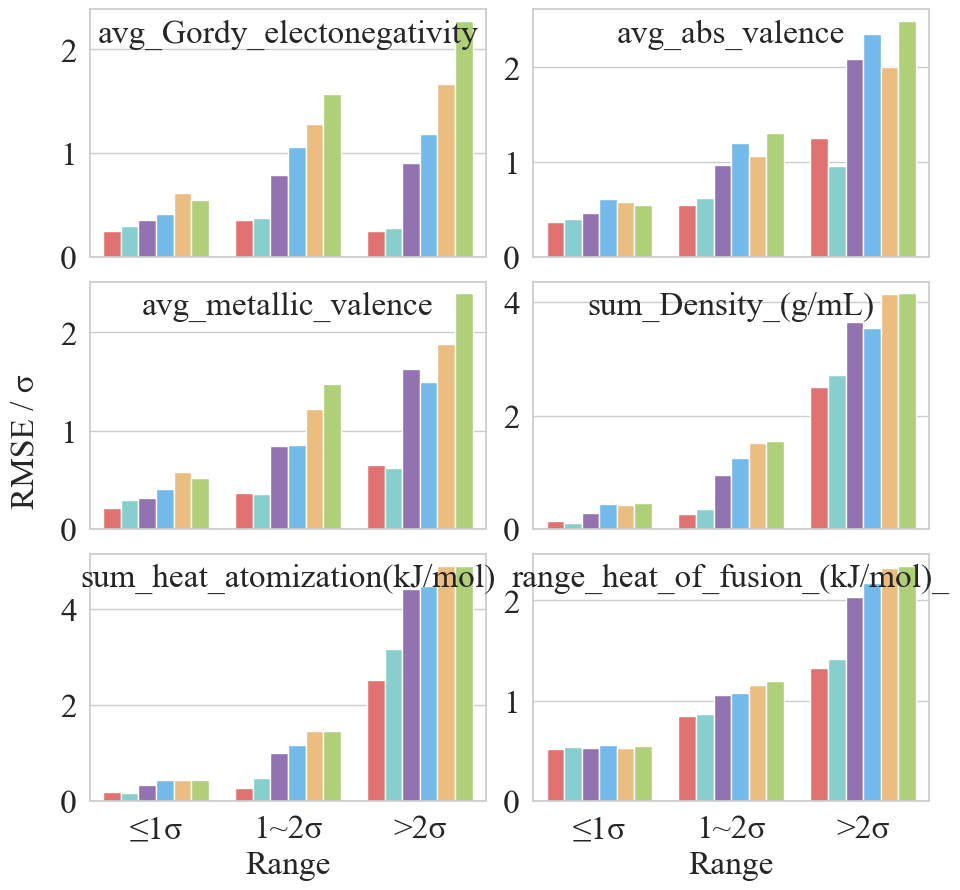

In [23]:
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#5FBDFF", "#FDBF6F", "#B3DE69", "#FFC0D9"])

cols = 2
rows = len(missing_columns) // cols if len(missing_columns) % cols == 0 else len(missing_columns) // cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows), sharex=True)
axs = axs.flatten()

all_df = pd.DataFrame(columns=["RMSE", "Method", "Range", "Col"])

for col in missing_columns:
    ax = axs[missing_columns.index(col)]
    df = pd.DataFrame(columns=["RMSE", "Method", "Range"])

    col_mean = X[col].mean()
    col_std = X[col].std()
    # 统计在填充前缺失值在一个std距离内的缺失值
    col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
    col_missing_values = X_with_nan.loc[col_missing_index, col]
    original_values = X.loc[col_missing_index, col]
    count = {"1": [], "2": [], "3": []}
    for idx, val in zip(col_missing_index, original_values):
        if abs(val - col_mean) > 2 * col_std:
            count["3"].append(idx)
        elif abs(val - col_mean) > 1 * col_std:
            count["2"].append(idx)
        else:
            count["1"].append(idx)
    col_mean = abs(col_mean)
    score_std = rmse(original_values[count["1"]], X_filled_et.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_et.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_et.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"et: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MatImpute", "MatImpute", "MatImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_hyper.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_hyper.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_hyper.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"hyper: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["HyperImpute", "HyperImpute", "HyperImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_missforest.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_missforest.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_missforest.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"missforest: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MissForest", "MissForest", "MissForest"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_gain.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_gain.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_gain.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"gain: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Gain", "Gain", "Gain"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_sinkhorn.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_sinkhorn.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_sinkhorn.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"sinkhorn: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Sinkhorn", "Sinkhorn", "Sinkhorn"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    # mean
    score_std = rmse(original_values[count["1"]], X_filled_mean.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_mean.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_mean.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"mean: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Mean", "Mean", "Mean"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)
    df["Col"] = [col] * df.shape[0]
    all_df = pd.concat([all_df, df], ignore_index=True)

    df.drop(columns=["Col"], inplace=True)

    sns.barplot(x="Range", y="RMSE", hue="Method", data=df, ax=ax, palette=my_palette)
    # del legend
    ax.get_legend().remove()
    # del y label
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    # set x label size
    ax.set_xlabel("Range", fontsize=24)
    # 把标题添加到图的框内
    ax.text(0.5, 0.9, col, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=24)

# get legend
handles, labels = ax.get_legend_handles_labels()

# del empty subplot
for i in range(len(missing_columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
fig.text(0.02, 0.5, 'RMSE / σ', va='center', rotation='vertical', fontsize=24)
fig.subplots_adjust(hspace=0.1, wspace=0.12, left=0.1, bottom=0.1)
# plt.savefig("std-rmse.png", dpi=300)
all_df.to_excel("std-rmse-bandgap.xlsx", index=False)